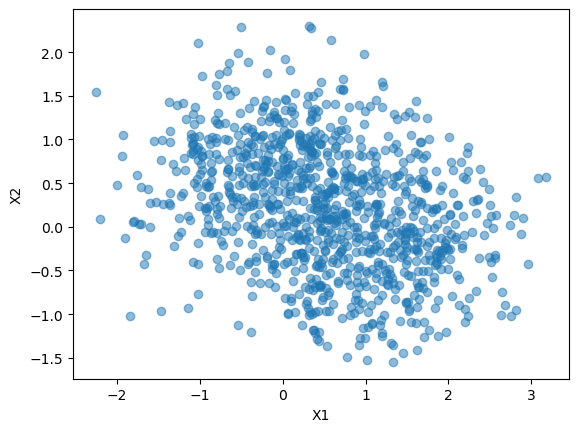

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.5)

# plotting
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [45]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [46]:
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Notice that some instances have label equal to -1, that means they are considered outliers by the algorithm. 

In [47]:
dbscan.core_sample_indices_

array([ 33, 340, 408, 411, 443, 479, 539, 572, 645, 767, 810, 865, 929,
       945], dtype=int64)

In [48]:
dbscan.components_

array([[1.13769602, 0.25555958],
       [0.52295633, 0.38079086],
       [0.354668  , 0.85409386],
       [0.52738447, 0.09991512],
       [0.57425334, 0.0913413 ],
       [0.57987035, 0.43272946],
       [1.12920678, 0.26269456],
       [0.61992253, 0.42832862],
       [1.12955101, 0.26378216],
       [0.79149409, 0.57384602],
       [0.19456697, 1.02884975],
       [0.62241517, 0.43971154],
       [0.75226504, 0.15106318],
       [0.33840077, 0.88231914]])

Surprisingly, the DBSCAN class does not have any predict() method, although it has a fit_predict() method. In other words, it cannot predict new instances to assign in a cluster. This decision was made beacause different classification algorithm can be better for different tasks.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13, n_jobs=-1)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_jobs=-1, n_neighbors=13)

Now we can predict

In [64]:
import numpy as np

X_new = np.array([[-0.5,0], [0, 0.5], [1,-0.1]])
knn.predict(X_new)

array([4, 4, 0], dtype=int64)

In [66]:
knn.predict_proba(X_new).round(2)

array([[0.15, 0.08, 0.15, 0.15, 0.23, 0.08, 0.08, 0.08],
       [0.15, 0.08, 0.15, 0.15, 0.23, 0.08, 0.08, 0.08],
       [0.23, 0.08, 0.15, 0.15, 0.23, 0.08, 0.  , 0.08]])

In short, DBSCAN is very simple yet powerfull algorithm that can find any number of cluster of any shape. But due to high computational complexity O(m^2n) it may not be feasible to use for large dataset.